## Import dependency

In [1]:
# import libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from datetime import datetime as dt

import csv

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Bitcoin Data

In [2]:
data = pd.read_csv('BTC-USD.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-31,28032.261719,28639.896484,27583.714844,28478.484375,28478.484375,19001327598
1,2023-04-01,28473.332031,28802.457031,28297.171875,28411.035156,28411.035156,10876469901
2,2023-04-02,28462.845703,28518.958984,27884.087891,28199.308594,28199.308594,12284641999
3,2023-04-03,28183.080078,28475.623047,27276.720703,27790.220703,27790.220703,19556501327
4,2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859
...,...,...,...,...,...,...,...
362,2024-03-27,69991.898438,71727.687500,68381.929688,69455.343750,69455.343750,40827113309
363,2024-03-28,69452.773438,71546.023438,68895.507813,70744.953125,70744.953125,34374900617
364,2024-03-29,70744.796875,70913.093750,69076.656250,69892.828125,69892.828125,25230851763
365,2024-03-30,69893.445313,70355.492188,69601.062500,69645.304688,69645.304688,17130241883


In [3]:
data = data[['Date', 'Close']]
data

,Date,Close
0,2023-03-31,28478.484375
1,2023-04-01,28411.035156
2,2023-04-02,28199.308594
3,2023-04-03,27790.220703
4,2023-04-04,28168.089844
...,...,...
362,2024-03-27,69455.343750
363,2024-03-28,70744.953125
364,2024-03-29,69892.828125
365,2024-03-30,69645.304688


## Visualize the Bitcoin Data

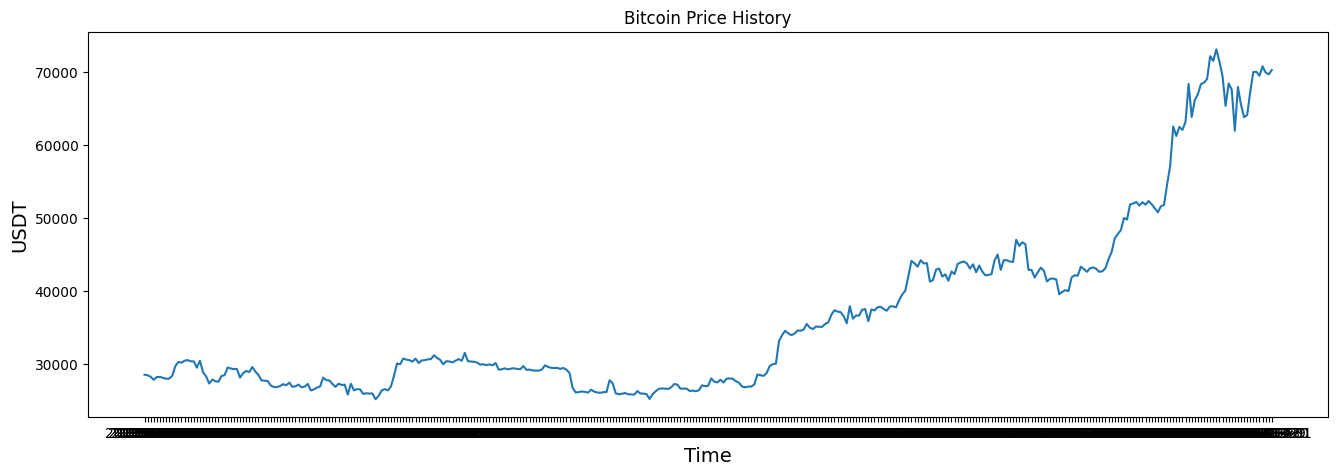

In [4]:
# Visualize the close price history
plt.figure(figsize=(16, 5))
plt.title("Bitcoin Price History")
plt.plot(data["Date"], data["Close"])
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.show()

## Create Train and Test Data

In [5]:
# Create new data with only the "Close" column
close = data.filter(["Close"])
# Convert the dataframe to a np array
close_array = close.values
# See the train data len
train_close_len = math.ceil(len(close_array) * 0.8)
train_close_len

294

In [6]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_array)
scaled_data

array([[6.99310012e-02],
       [6.85246027e-02],
       [6.41098455e-02],
       [5.55798639e-02],
       [6.34588965e-02],
       [6.36652096e-02],
       [6.08744041e-02],
       [5.84080957e-02],
       [5.88654786e-02],
       [6.68985333e-02],
       [9.44206778e-02],
       [1.06557717e-01],
       [1.04555878e-01],
       [1.09977480e-01],
       [1.11783880e-01],
       [1.08297491e-01],
       [1.08232005e-01],
       [9.00849679e-02],
       [1.09945918e-01],
       [7.71078934e-02],
       [6.50831740e-02],
       [4.48767127e-02],
       [5.61486705e-02],
       [5.14338920e-02],
       [5.00567748e-02],
       [6.63678046e-02],
       [6.87678534e-02],
       [9.06842776e-02],
       [8.79001103e-02],
       [8.59865221e-02],
       [8.64101847e-02],
       [6.18633302e-02],
       [7.41440472e-02],
       [8.09367802e-02],
       [7.76298255e-02],
       [9.19478127e-02],
       [7.88165124e-02],
       [6.94408754e-02],
       [5.35792463e-02],
       [5.28390687e-02],


In [7]:
# Create the training dataset
train_data = scaled_data[0 : train_close_len, :]
# Create X_train and y_train
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(X_train)
        print(y_train)

[array([0.069931  , 0.0685246 , 0.06410985, 0.05557986, 0.0634589 ,
       0.06366521, 0.0608744 , 0.0584081 , 0.05886548, 0.06689853,
       0.09442068, 0.10655772, 0.10455588, 0.10997748, 0.11178388,
       0.10829749, 0.108232  , 0.09008497, 0.10994592, 0.07710789,
       0.06508317, 0.04487671, 0.05614867, 0.05143389, 0.05005677,
       0.0663678 , 0.06876785, 0.09068428, 0.08790011, 0.08598652,
       0.08641018, 0.06186333, 0.07414405, 0.08093678, 0.07762983,
       0.09194781, 0.07881651, 0.06944088, 0.05357925, 0.05283907,
       0.05206717, 0.03911925, 0.03503661, 0.03460056, 0.03765653,
       0.04312069, 0.039867  , 0.04741832, 0.03560415, 0.03681185,
       0.04180482, 0.03396977, 0.03600175, 0.04380947, 0.02523295,
       0.02818108, 0.03324967, 0.03635781, 0.06173985, 0.05465541])]
[0.05374764435902901]


In [8]:
#  make X_train and y_train np array
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(234, 60, 1)

In [10]:
# create the testing dataset
test_data = scaled_data[train_close_len - 60 : , :]
# create X_test and y_test
X_test = []
y_test = data.iloc[train_close_len : , :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i - 60 : i, 0])

In [11]:
# convert the test data to a np array and reshape the test data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## Build a LSTM Model

In [12]:
# Build the LSTM Model
model = Sequential()

model.add(LSTM(units=512, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], 1)))


model.add(LSTM(units=256, activation='relu', return_sequences=False))


model.add(Dense(units=1))

In [13]:
# compile the LSTM model
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['mae'])

In [14]:
# train the LSTM model
model.fit(X_train, y_train,
          epochs=3,
          batch_size=100,
          verbose=1)

Epoch 1/3
3/3 [==============================] - 9s 2s/step - loss: 0.0345 - mae: 0.1351
Epoch 2/3
3/3 [==============================] - 6s 2s/step - loss: 0.0065 - mae: 0.0655
Epoch 3/3
3/3 [==============================] - 5s 2s/step - loss: 0.0047 - mae: 0.0587


In [15]:
# predict with LSTM model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

3/3 [==============================] - 1s 159ms/step


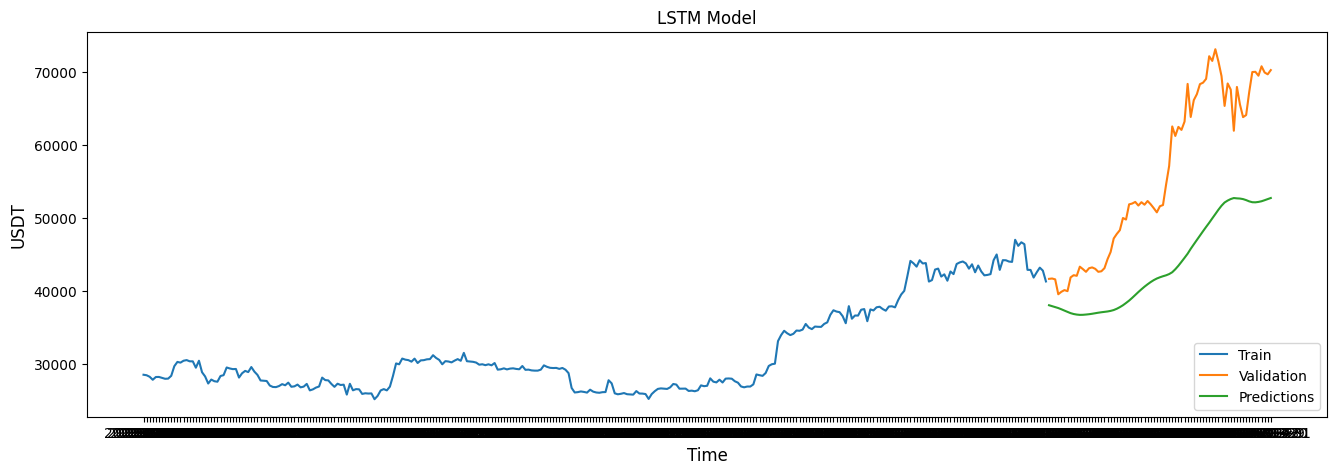

In [16]:
# plot the data
train = close[:train_close_len]
valid = close[train_close_len:]
valid["Predictions"] = predictions
#visualize the data
plt.figure(figsize=(16, 5))
plt.title("LSTM Model")
plt.xlabel("Time", fontsize=12)
plt.ylabel("USDT", fontsize=12)
plt.plot(data["Date"][:train_close_len], train["Close"])
plt.plot(data["Date"][train_close_len:], valid[["Close", "Predictions"]])
plt.legend(["Train", "Validation", "Predictions"], loc="lower right")
plt.show()

## Build a Optimized LSTM Model

In [17]:
# change the parameters of first LSTM model and build the Optimized LSTM Model
optimized_model = Sequential()

optimized_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

optimized_model.add(LSTM(100, return_sequences=False))

optimized_model.add(Dense(50))

optimized_model.add(Dense(1))

In [18]:
# compile the model
optimized_model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['mae'])

In [19]:
# train the optimized model
optimized_model.fit(X_train, y_train,
          batch_size=10,
          epochs=10,
          verbose=1)

Epoch 1/10
24/24 [==============================] - 5s 53ms/step - loss: 0.0072 - mae: 0.0560
Epoch 2/10
24/24 [==============================] - 2s 75ms/step - loss: 0.0012 - mae: 0.0248
Epoch 3/10
24/24 [==============================] - 2s 77ms/step - loss: 0.0012 - mae: 0.0252
Epoch 4/10
24/24 [==============================] - 1s 53ms/step - loss: 0.0013 - mae: 0.0257
Epoch 5/10
24/24 [==============================] - 1s 49ms/step - loss: 0.0012 - mae: 0.0258
Epoch 6/10
24/24 [==============================] - 1s 49ms/step - loss: 9.4017e-04 - mae: 0.0224
Epoch 7/10
24/24 [==============================] - 1s 49ms/step - loss: 9.2365e-04 - mae: 0.0220
Epoch 8/10
24/24 [==============================] - 1s 49ms/step - loss: 0.0010 - mae: 0.0245
Epoch 9/10
24/24 [==============================] - 1s 49ms/step - loss: 8.4806e-04 - mae: 0.0212
Epoch 10/10
24/24 [==============================] - 1s 49ms/step - loss: 7.7989e-04 - mae: 0.0204


## prediction

In [20]:
# Predict with optimized LSTM model
o_predictions = optimized_model.predict(X_test)
o_predictions = scaler.inverse_transform(o_predictions)

3/3 [==============================] - 1s 22ms/step


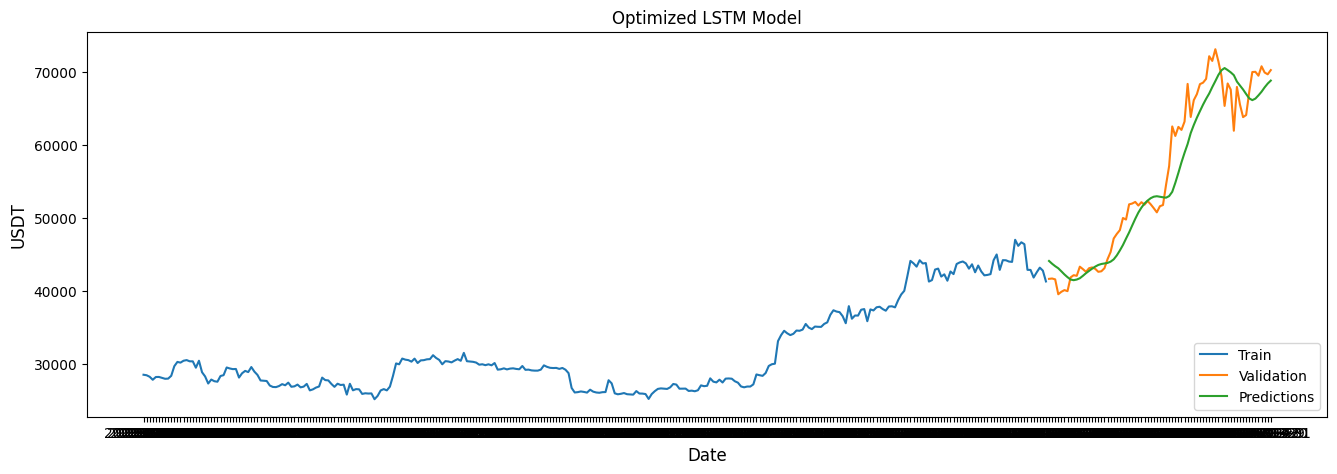

In [21]:
# plot the data
train = close[:train_close_len]
valid = close[train_close_len:]
valid["Predictions"] = o_predictions
#visualize the data
plt.figure(figsize=(16, 5))
plt.title("Optimized LSTM Model")
plt.xlabel("Date", fontsize=12)
plt.ylabel("USDT", fontsize=12)
plt.plot(data["Date"][:train_close_len], train["Close"])
plt.plot(data["Date"][train_close_len:], valid[["Close", "Predictions"]])
plt.legend(["Train", "Validation", "Predictions"], loc="lower right")
plt.show()